# Group Project CE889 (Group 8)

# Rossmann Store Sales Prediction

# Data Pre-Processing and Visualization

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


# Read CSV Files

In [131]:
train = pd.read_csv("train.csv", sep=',', parse_dates=['Date'],
                    dtype={'StateHoliday': str, 'SchoolHoliday':str})

test = pd.read_csv("test.csv", sep=",", index_col = 'Id', parse_dates=['Date'],
                  dtype={'StateHoliday': str, 'SchoolHoliday':str})

store = pd.read_csv("store.csv", sep=",", dtype={'StoreType': str,
                                                      'Assortment': str,
                                                      'PromoInterval': str})

# Train Dataset Preprocessing

In [132]:
print(train.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1  


In [133]:
print(train.shape)

(1017209, 9)


In [134]:
print(train.describe())

              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  
count  1.017209e+06  
mean   3.815145e-01  
std    4.857586e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.000000e+00  
max    1.000000e+00  


# Check missing values

In [135]:
missing = train.isnull().sum()
missing.sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [136]:
print(train.tail())

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday SchoolHoliday  
1017204            a             1  
1017205            a             1  
1017206            a             1  
1017207            a             1  
1017208            a             1  


In [137]:
#year and month column to analyise seasonal effects on sales
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month

In [138]:
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
               'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
list(train.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Sales']

In [139]:
print(train.dtypes)

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
Sales                     int64
dtype: object


# explore these objects

In [140]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [141]:
train.loc[train['StateHoliday'] == '0', 'StateHoliday'] = 0
train.loc[train['StateHoliday'] == 'a', 'StateHoliday'] = 1
train.loc[train['StateHoliday'] == 'b', 'StateHoliday'] = 2
train.loc[train['StateHoliday'] == 'c', 'StateHoliday'] = 3
train['StateHoliday'] = train['StateHoliday'].astype(int, copy=False)
print('levels :', train['StateHoliday'].unique(), '; data type :', train['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [142]:
train.loc[train['SchoolHoliday'] == '0', 'SchoolHoliday'] = 0
train.loc[train['SchoolHoliday'] == '1', 'SchoolHoliday'] = 1
train['SchoolHoliday'] = train['SchoolHoliday'].astype(int, copy=False)
print('levels :', train['SchoolHoliday'].unique(), '; data type :', train['SchoolHoliday'].dtype)

levels : [1 0] ; data type : int64


In [143]:
print(train.describe())

              Store     DayOfWeek          Year         Month     Customers  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  2.013832e+03  5.846762e+00  6.331459e+02   
std    3.219087e+02  1.997391e+00  7.773960e-01  3.326097e+00  4.644117e+02   
min    1.000000e+00  1.000000e+00  2.013000e+03  1.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  2.013000e+03  3.000000e+00  4.050000e+02   
50%    5.580000e+02  4.000000e+00  2.014000e+03  6.000000e+00  6.090000e+02   
75%    8.380000e+02  6.000000e+00  2.014000e+03  8.000000e+00  8.370000e+02   
max    1.115000e+03  7.000000e+00  2.015000e+03  1.200000e+01  7.388000e+03   

               Open         Promo  StateHoliday  SchoolHoliday         Sales  
count  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  1.017209e+06  
mean   8.301067e-01  3.815145e-01  4.516279e-02   1.786467e-01  5.773819e+03  
std    3.755392e-01  4.857586e-01  2.836559e-01   3

In [144]:
#NANs for selected columns

In [145]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : train[colname].isnull().sum() for colname in train.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Customers', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0),
 ('Sales', 0)]

# Pairwise correlation of columns and visulization

In [146]:
corMat = pd.DataFrame(train.loc[:, ['DayOfWeek', 'Sales', 'Month', 'Year', 'Customers', 'Promo',
                                    'StateHoliday', 'SchoolHoliday']].corr())
print(corMat)

               DayOfWeek     Sales     Month      Year  Customers     Promo  \
DayOfWeek       1.000000 -0.462125 -0.005362  0.001937  -0.386445 -0.392925   
Sales          -0.462125  1.000000  0.048768  0.023519   0.894711  0.452345   
Month          -0.005362  0.048768  1.000000 -0.269382   0.038179 -0.011747   
Year            0.001937  0.023519 -0.269382  1.000000  -0.001212  0.024300   
Customers      -0.386445  0.894711  0.038179 -0.001212   1.000000  0.316169   
Promo          -0.392925  0.452345 -0.011747  0.024300   0.316169  1.000000   
StateHoliday   -0.044265 -0.229029  0.038058 -0.005067  -0.204295 -0.024157   
SchoolHoliday  -0.205388  0.085124  0.103282 -0.036535   0.071568  0.067483   

               StateHoliday  SchoolHoliday  
DayOfWeek         -0.044265      -0.205388  
Sales             -0.229029       0.085124  
Month              0.038058       0.103282  
Year              -0.005067      -0.036535  
Customers         -0.204295       0.071568  
Promo             

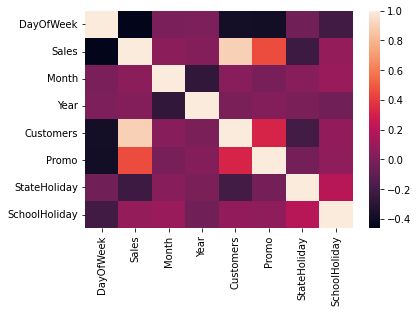

In [147]:
sns.heatmap(data=corMat)
plt.show()

# Training Dataset Processing

In [148]:
print(test.shape)

(41088, 7)


In [149]:
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month

In [150]:
#Overview of test set
print(test.head())

    Store  DayOfWeek       Date  Open  Promo StateHoliday SchoolHoliday  Year  \
Id                                                                              
1       1          4 2015-09-17   1.0      1            0             0  2015   
2       3          4 2015-09-17   1.0      1            0             0  2015   
3       7          4 2015-09-17   1.0      1            0             0  2015   
4       8          4 2015-09-17   1.0      1            0             0  2015   
5       9          4 2015-09-17   1.0      1            0             0  2015   

    Month  
Id         
1       9  
2       9  
3       9  
4       9  
5       9  


In [151]:
test = test[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open',
             'Promo', 'StateHoliday', 'SchoolHoliday']]
list(test.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

# check the missing values

In [152]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Open', 11),
 ('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [153]:
#there are 11 missing values of open field
print(test.loc[np.isnan(test['Open'])])

       Store  DayOfWeek       Date  Year  Month  Open  Promo StateHoliday  \
Id                                                                          
480      622          4 2015-09-17  2015      9   NaN      1            0   
1336     622          3 2015-09-16  2015      9   NaN      1            0   
2192     622          2 2015-09-15  2015      9   NaN      1            0   
3048     622          1 2015-09-14  2015      9   NaN      1            0   
4760     622          6 2015-09-12  2015      9   NaN      0            0   
5616     622          5 2015-09-11  2015      9   NaN      0            0   
6472     622          4 2015-09-10  2015      9   NaN      0            0   
7328     622          3 2015-09-09  2015      9   NaN      0            0   
8184     622          2 2015-09-08  2015      9   NaN      0            0   
9040     622          1 2015-09-07  2015      9   NaN      0            0   
10752    622          6 2015-09-05  2015      9   NaN      0            0   

In [154]:
#check this store in train dataset

In [155]:
print(train.loc[train['Store'] == 622].head())


      Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
621     622          5 2015-07-31  2015      7        540     1      1   
1736    622          4 2015-07-30  2015      7        406     1      1   
2851    622          3 2015-07-29  2015      7        468     1      1   
3966    622          2 2015-07-28  2015      7        417     1      1   
5081    622          1 2015-07-27  2015      7        517     1      1   

      StateHoliday  SchoolHoliday  Sales  
621              0              1   6306  
1736             0              1   5412  
2851             0              1   5326  
3966             0              1   4966  
5081             0              1   5413  


In [156]:
#label missing values of open with 1 in test set

In [157]:
test.loc[np.isnan(test['Open']), 'Open'] = 1

In [158]:
#check if there is any missing value left

In [159]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [160]:
print(test.dtypes)

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
dtype: object


In [161]:
#change the datatypes of objects to int

In [162]:
test.loc[test['StateHoliday'] == '0', 'StateHoliday'] = 0
test.loc[test['StateHoliday'] == 'a', 'StateHoliday'] = 1
test['StateHoliday'] = test['StateHoliday'].astype(int, copy=False)
print('levels :', test['StateHoliday'].unique(), '; data type :', test['StateHoliday'].dtype)

levels : [0 1] ; data type : int64


In [163]:
test.loc[test['SchoolHoliday'] == '0', 'SchoolHoliday'] = 0
test.loc[test['SchoolHoliday'] == '1', 'SchoolHoliday'] = 1
test['SchoolHoliday'] = test['SchoolHoliday'].astype(int, copy=False)
print('levels :', test['SchoolHoliday'].unique(), '; data type :', test['SchoolHoliday'].dtype)

levels : [0 1] ; data type : int64


In [164]:
print(test.dtypes)

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object


In [165]:
#Because there are two types of stateholidays in test set but there are 4 types of 
#stateholidays in train so we delete other from train

In [166]:
train = train.loc[train['StateHoliday'] < 2]

In [167]:
train.shape

(1006419, 11)

In [168]:
test.shape

(41088, 9)

# Store Dataset Preprocessing

In [169]:
#lets check the shape of store dataset
store.shape

(1115, 10)

In [170]:
#check the head
print(store.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [171]:
#check the tail
print(store.tail())

      Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113  

In [172]:
#now check the missing values
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Promo2SinceWeek', 544),
 ('Promo2SinceYear', 544),
 ('PromoInterval', 544),
 ('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0)]

In [173]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [174]:
#If there is no promotion, then the corresponding columns should have zero values.
store.loc[store['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [175]:
store.loc[store['Promo2'] != 0, 'Promo2SinceWeek'] = store['Promo2SinceWeek'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceWeek']
store.loc[store['Promo2'] != 0, 'Promo2SinceYear'] = store['Promo2SinceYear'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceYear']


In [176]:
#Function for converting objects to different levels
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value # factor starts at "start_value".
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [177]:
factor_to_integer(store, 'PromoInterval', start_value=0)

levels : [0 1 2 3] ; data type : int64


In [178]:
#now again check the datatypes
print(store.dtypes)

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
dtype: object


In [179]:
#change the categorical values of storetype and assortment into integers
factor_to_integer(store, 'StoreType')
factor_to_integer(store, 'Assortment')

levels : [0 1 2 3] ; data type : int64
levels : [0 1 2] ; data type : int64


In [180]:
#again check the datatypes
print(store.dtypes)

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
dtype: object


In [181]:
#again check that if there is any missing value
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

In [182]:
#Fill these missing values using sklearn with the mean of that column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(store)
store_imputed = imputer.transform(store)

In [183]:
store2 = pd.DataFrame(store_imputed, columns=store.columns.values)

In [184]:
#Again check for the missing values
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store2[colname].isnull().sum() for colname in store2.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('CompetitionDistance', 0),
 ('CompetitionOpenSinceMonth', 0),
 ('CompetitionOpenSinceYear', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

In [185]:
store2['CompetitionOpenSinceMonth'] = store2['CompetitionOpenSinceMonth'].max() - store2['CompetitionOpenSinceMonth']
store2['CompetitionOpenSinceYear'] = store2['CompetitionOpenSinceYear'].max() - store2['CompetitionOpenSinceYear']
print(store2.tail())

       Store  StoreType  Assortment  CompetitionDistance  \
1110  1111.0        1.0         0.0               1900.0   
1111  1112.0        0.0         1.0               1880.0   
1112  1113.0        1.0         1.0               9260.0   
1113  1114.0        1.0         1.0                870.0   
1114  1115.0        2.0         1.0               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                   6.000000                  1.000000     1.0   
1111                   8.000000                  9.000000     0.0   
1112                   4.775296                  6.331143     0.0   
1113                   4.775296                  6.331143     0.0   
1114                   4.775296                  6.331143     1.0   

      Promo2SinceWeek  Promo2SinceYear  PromoInterval  
1110             19.0              2.0            1.0  
1111              0.0              0.0            0.0  
1112              0.0              0.0            0.0  


In [186]:
#Now check weather the store column is same in both in train and store datasets
len(store2['Store']) - sum(store2['Store'].isin(train['Store']))

0

In [187]:
#check weather there are same stores in train and store
StoreStore = pd.Series(store2['Store']) 
StoreTrain = pd.Series(train['Store'])
sum(StoreTrain.isin(StoreStore) == False)

0

# Now merge train and store datasets

In [212]:
train_store = pd.merge(train, store2, how = 'left', on='Store')
#left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
#Column or index level names to join on. These must be found in both DataFrames. 
#If on is None and not merging on indexes then this defaults to the intersection of 
#the columns in both DataFrames.

In [189]:
train_store.head()

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,555,1,1,0,1,5263,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1,2,5,2015-07-31,2015,7,625,1,1,0,1,6064,1.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,1.0
2,3,5,2015-07-31,2015,7,821,1,1,0,1,8314,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,4,5,2015-07-31,2015,7,1498,1,1,0,1,13995,0.0,1.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0
4,5,5,2015-07-31,2015,7,559,1,1,0,1,4822,1.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0


# Merge test and store

In [190]:
test_store = test.reset_index().merge(store2, how = 'left', on='Store').set_index('Id')

In [191]:
test_store.head()

,Store,DayOfWeek,Date,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,,,
1,1,4,2015-09-17,2015,9,1.0,1,0,0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
2,3,4,2015-09-17,2015,9,1.0,1,0,0,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,7,4,2015-09-17,2015,9,1.0,1,0,0,1.0,1.0,24000.0,8.0,2.0,0.0,0.0,0.0,0.0
4,8,4,2015-09-17,2015,9,1.0,1,0,0,1.0,0.0,7520.0,2.0,1.0,0.0,0.0,0.0,0.0
5,9,4,2015-09-17,2015,9,1.0,1,0,0,1.0,1.0,2030.0,4.0,15.0,0.0,0.0,0.0,0.0


In [192]:
test_store.shape

(41088, 18)

In [193]:
train_store.shape

(1006419, 20)

# Visualization of sales with different factors

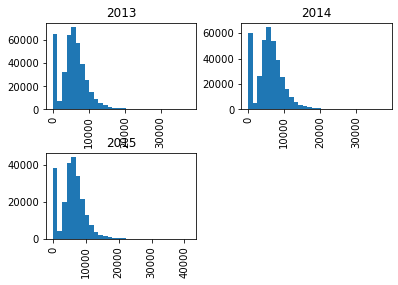

In [194]:
train_store.hist(column='Sales',by='Year',bins=30)
plt.show()

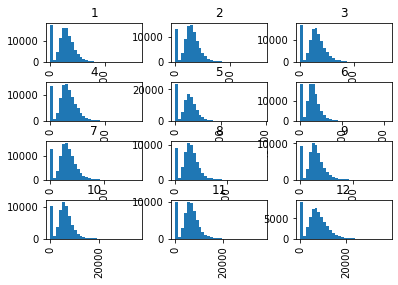

In [195]:
train_store.hist(column='Sales',by='Month',bins=30)
plt.show()

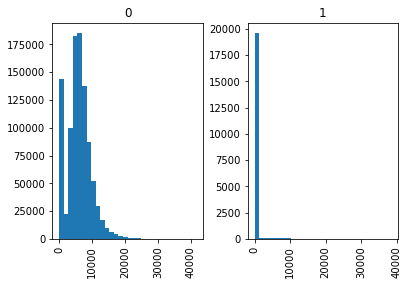

In [196]:
train_store.hist(column='Sales',by='StateHoliday',bins=30)
plt.show()

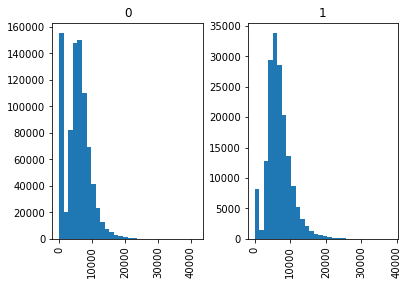

In [197]:
train_store.hist(column='Sales',by='SchoolHoliday',bins=30)
plt.show()

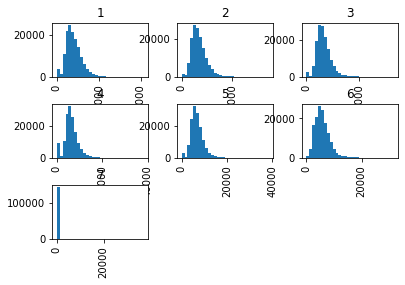

In [198]:
train_store.hist(column='Sales',by='DayOfWeek',bins=30)
plt.show()

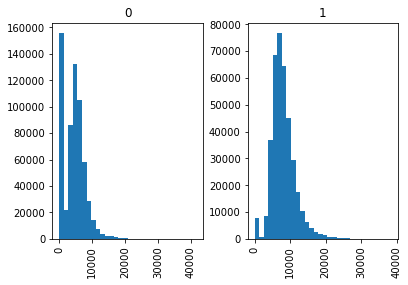

In [199]:
train_store.hist(column='Sales',by='Promo',bins=30)
plt.show()

In [200]:
#Modelig

In [201]:
train_model = train_store.drop(['Customers', 'Date'], axis=1)
train_model['Year'] = train_model['Year'].max() - train_model['Year']
train_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,0,7,1,1,0,1,5263,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1,2,5,0,7,1,1,0,1,6064,1.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,1.0
2,3,5,0,7,1,1,0,1,8314,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,4,5,0,7,1,1,0,1,13995,0.0,1.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0
4,5,5,0,7,1,1,0,1,4822,1.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0


In [202]:
test_model = test_store.drop(['Date'], axis=1)
test_model['Year'] = test_model['Year'].max() - test_model['Year']
test_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,,
1,1,4,0,9,1.0,1,0,0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
2,3,4,0,9,1.0,1,0,0,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,7,4,0,9,1.0,1,0,0,1.0,1.0,24000.0,8.0,2.0,0.0,0.0,0.0,0.0
4,8,4,0,9,1.0,1,0,0,1.0,0.0,7520.0,2.0,1.0,0.0,0.0,0.0,0.0
5,9,4,0,9,1.0,1,0,0,1.0,1.0,2030.0,4.0,15.0,0.0,0.0,0.0,0.0


In [203]:
train_model.shape

(1006419, 18)

In [204]:
test_model.shape

(41088, 17)

# Put the sales field at the end for the output

In [205]:
SalesDatafield = train_model['Sales']
train_model = train_model.drop(['Sales'], axis=1)
train_model['Sales'] = SalesDatafield

In [207]:
train_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,0,7,1,1,0,1,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0,5263
1,2,5,0,7,1,1,0,1,1.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,1.0,6064
2,3,5,0,7,1,1,0,1,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0,8314
3,4,5,0,7,1,1,0,1,0.0,1.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0,13995
4,5,5,0,7,1,1,0,1,1.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0,4822


In [208]:
#Normalisation of Training dataset for validation

In [209]:
summary = train_model.describe()
train_normalized = train_model.copy()
ncols = len(train_normalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    train_normalized.iloc[:,i:(i + 1)] = \
        (train_normalized.iloc[:,i:(i + 1)] - mean) / sd
sales_normalized = train_normalized['Sales']
train_normalized = train_normalized.drop(['Sales'], axis=1)
train_normalized['Sales'] = sales_normalized

In [210]:
train_normalized.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,-1.731639,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,2.207088,-1.770361,-0.930468,-0.539891,-0.669720,0.138083,-1.001134,-0.802376,-0.810676,-0.824297,-0.149270
1,-1.728533,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,2.207088,-0.300229,-0.930468,-0.630738,-1.423676,0.340127,0.998866,1.416358,1.683018,0.194891,0.060270
2,-1.725426,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,2.207088,-0.300229,-0.930468,1.129094,-1.800655,0.542171,0.998866,1.356392,1.184279,0.194891,0.648863
3,-1.722320,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,2.207088,-1.770361,1.008815,-0.624249,-0.669720,-0.063961,-1.001134,-0.802376,-0.810676,-0.824297,2.134997
4,-1.719213,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,2.207088,-0.300229,-0.930468,3.177039,1.215170,-1.276224,-1.001134,-0.802376,-0.810676,-0.824297,-0.264634


# Split training data in train and test for cross validation

In [226]:
#TrainTest split on simple train model
from sklearn.model_selection import train_test_split
X = train_model.drop('Sales', axis=1)
Y = train_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [229]:
X_train.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
887978,864,5,2,4,1,0,0,0,1.0,0.0,1020.0,2.0,3.0,1.0,5.0,6.0,2.0
502232,908,3,1,4,1,1,0,0,1.0,0.0,1980.0,5.0,5.0,1.0,13.0,6.0,1.0
650815,81,7,2,11,0,0,0,0,1.0,0.0,2370.0,9.0,4.0,1.0,10.0,1.0,1.0
117588,514,5,0,4,1,1,0,0,0.0,1.0,1200.0,5.0,3.0,1.0,23.0,3.0,1.0
341372,761,6,1,9,1,0,0,0,1.0,0.0,2390.0,3.0,3.0,0.0,0.0,0.0,0.0


In [228]:
#TrainTest split on normalised train model
from sklearn.model_selection import train_test_split
X_normal = train_normalized.drop('Sales', axis=1)
Y_normal = train_normalized['Sales']
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, Y_normal, random_state=0)

In [225]:
y_train.head()

887978   -0.419761
502232   -0.112385
650815   -1.526056
117588    0.439324
341372    0.006381
Name: Sales, dtype: float64